CS342 Machine Learning Assignment - 2046965

In [ ]:
# Importing permitted libraries:

import pandas as pd  # To manipulate and query dataframes 
import numpy as np   # To implement various permitted mathematical tools such as SVD 
import matplotlib.pyplot as plt  # To produce visualisations 
import random  # To randomize the steps taken by the perceptron algorithm
import seaborn as sns  # To produce visualisations 
import plotly.express as px  # To produce visualisations 

In [ ]:
# Importing in the CSV file containing the data 

dataset = pd.read_csv("accent-mfcc-data-1.data", header = None)
dataset.columns = ["Accent", "X1", "X2", "X3","X4","X5","X6","X7","X8","X9","X10","X11","X12"]
dataset

,Accent,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,US,-0.525273,-3.868338,3.548304,1.496249,3.490753,5.849887,-7.747027,9.738836,-11.754543,7.129909,0.209947,-1.946914
325,US,-2.094001,-1.073113,1.217397,-0.550790,2.666547,7.449942,-6.418064,10.907098,-11.134323,6.728373,2.461446,-0.026113
326,US,2.116909,-4.441482,5.350392,3.675396,2.715876,3.682670,-4.500850,11.798565,-12.031005,7.566142,-0.606010,-2.245129
327,US,0.299616,0.324844,3.299919,2.044040,3.634828,6.693840,-5.676224,12.000518,-11.912901,4.664406,1.197789,-2.230275


In [ ]:
# Checking the dimensions of the data matrix:

dataset.shape

(329, 13)

## Plot showing the 2D feature space defined by Linear PCA:

In [ ]:
# Defining a function to calculate the Principal Components of the original data matrix using SVD
# The function returns the change of basis data matrix containing the Principal Components of X as columns 

def PCA(X):
    X_centered = X.apply(lambda x: x-x.mean())  # Centering the original dataset to have mean 0
    U,S,VT = np.linalg.svd(X_centered)  # Decomposing the centered dataset via SVD 
    return(np.matmul(X_centered,VT.T))   # Returning the change of basis matrix with PCs as columns 

In [ ]:
X_train= dataset.drop('Accent', axis = 1)  # Removing the labels column 
X_train

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310
...,...,...,...,...,...,...,...,...,...,...,...,...
324,-0.525273,-3.868338,3.548304,1.496249,3.490753,5.849887,-7.747027,9.738836,-11.754543,7.129909,0.209947,-1.946914
325,-2.094001,-1.073113,1.217397,-0.550790,2.666547,7.449942,-6.418064,10.907098,-11.134323,6.728373,2.461446,-0.026113
326,2.116909,-4.441482,5.350392,3.675396,2.715876,3.682670,-4.500850,11.798565,-12.031005,7.566142,-0.606010,-2.245129
327,0.299616,0.324844,3.299919,2.044040,3.634828,6.693840,-5.676224,12.000518,-11.912901,4.664406,1.197789,-2.230275


In [ ]:
pca_matrix = PCA(X_train)  # Performing linear PCA on the original dataset (with the labels removed)

In [ ]:
pca_matrix.columns = ["PC1", "PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12"]
pca_matrix  # Below we see the change of basis via linear PCA as a dataframe 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-4.416514,4.164175,4.239893,-1.933770,1.867050,2.686963,1.385065,-0.816220,2.084303,0.093594,-1.230223,-0.969158
1,-7.203460,3.914906,0.135499,-1.116917,0.086202,2.622308,0.968688,-0.065760,-0.728733,0.825870,-1.651181,-1.180103
2,-4.576267,3.381231,5.051762,-2.980081,0.751600,3.369899,-1.675675,2.138991,-2.352451,-0.839640,-2.029757,-1.518098
3,-4.018973,1.949438,3.950812,-3.119498,0.061760,2.457161,-1.664013,1.315162,-0.569104,-0.075191,-0.376911,-1.113048
4,-3.365465,1.950874,4.841624,-2.728546,-0.473252,2.731715,0.651871,0.452296,1.022621,-0.010624,-1.446961,0.056011
...,...,...,...,...,...,...,...,...,...,...,...,...
324,18.994139,-1.716195,-2.273646,-3.813991,-3.272676,-1.390090,-0.017195,-0.269399,-0.253430,-1.621210,-1.400905,-2.018797
325,18.917475,-5.802353,-3.574305,-1.745072,-4.072714,-3.124894,-0.108292,2.027955,1.612707,-1.459827,-0.956107,-1.512847
326,19.129807,1.559144,-4.752362,-4.210323,-2.469858,0.386861,-3.221652,-1.406167,1.477825,-1.812355,-0.463005,-1.734163
327,17.709146,-4.038711,-5.050969,-3.956027,-3.303957,0.753350,-2.083025,2.889481,0.741865,-1.944886,-1.248679,-0.931452


In [ ]:
y = dataset.Accent
pca_matrix_accent = pca_matrix.assign(Accent = y)
pca_matrix_accent   # Adding the labels column back onto the new PCA dataframe (as labels do not change under PCA)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,Accent
0,-4.416514,4.164175,4.239893,-1.933770,1.867050,2.686963,1.385065,-0.816220,2.084303,0.093594,-1.230223,-0.969158,ES
1,-7.203460,3.914906,0.135499,-1.116917,0.086202,2.622308,0.968688,-0.065760,-0.728733,0.825870,-1.651181,-1.180103,ES
2,-4.576267,3.381231,5.051762,-2.980081,0.751600,3.369899,-1.675675,2.138991,-2.352451,-0.839640,-2.029757,-1.518098,ES
3,-4.018973,1.949438,3.950812,-3.119498,0.061760,2.457161,-1.664013,1.315162,-0.569104,-0.075191,-0.376911,-1.113048,ES
4,-3.365465,1.950874,4.841624,-2.728546,-0.473252,2.731715,0.651871,0.452296,1.022621,-0.010624,-1.446961,0.056011,ES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,18.994139,-1.716195,-2.273646,-3.813991,-3.272676,-1.390090,-0.017195,-0.269399,-0.253430,-1.621210,-1.400905,-2.018797,US
325,18.917475,-5.802353,-3.574305,-1.745072,-4.072714,-3.124894,-0.108292,2.027955,1.612707,-1.459827,-0.956107,-1.512847,US
326,19.129807,1.559144,-4.752362,-4.210323,-2.469858,0.386861,-3.221652,-1.406167,1.477825,-1.812355,-0.463005,-1.734163,US
327,17.709146,-4.038711,-5.050969,-3.956027,-3.303957,0.753350,-2.083025,2.889481,0.741865,-1.944886,-1.248679,-0.931452,US


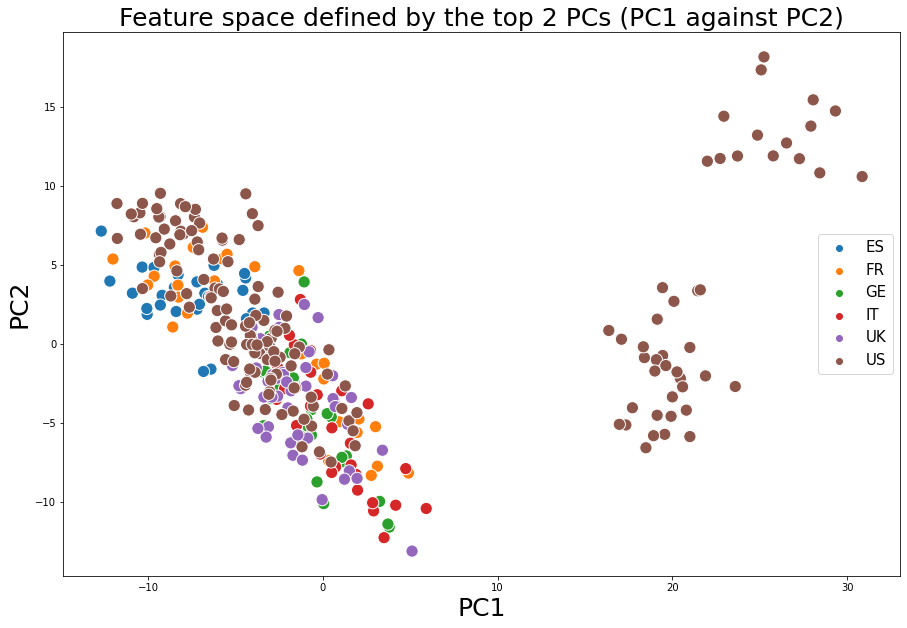

In [ ]:
#Plotting the first 2 (the 2 most important) Principal Components, PC1 and PC2 to determine visually whether the data is linearly separable in a 2-D plot of PC1 and PC2:

plt.figure(figsize=(15,10))
sns.scatterplot(x = pca_matrix_accent["PC1"], y = pca_matrix_accent["PC2"], hue = pca_matrix_accent.Accent, s= 150)
plt.legend(loc = "center right", fontsize = 15)
plt.xlabel("PC1", fontsize = 25)
plt.ylabel("PC2", fontsize = 25)
plt.title("Feature space defined by the top 2 PCs (PC1 against PC2)", fontsize = 25)
plt.show()

###### We can see clearly that when the original data matrix is compressed into a 2-dimensional data matrix using the 2 most important principal components, the data is NOT linearly separable. This is clear as most of the data points for each accent are scattered on top of one another. Only some data points from the US accent label are clustered separately. As a result, we can conclude via visual inspection that the data is not linearly separable in the new 2D feature space defined by the top 2 linear principal components. This conclusion can be derived as it is clear that it is impossible to draw lines which perfectly separates the 6 accent classes into 6 distinct regions in the feature space defined by PC1 and PC2.

In [ ]:
# *Just for experimentation* plotting a 3D visualisation to determine whether the feature space defined by the top 3 PCs derived from linear PCA is linearly separable or not 

fig = px.scatter_3d(pca_matrix_accent, x='PC1', y='PC2', z='PC3',
                    color='Accent')
fig.show()

Upon visual analysis, we can also see that the data is NOT linearly separable in the feature space defined by 3 principal components through linear PCA. Once again, similarly to the top 2 PC plot, the data is mostly scattered on top of one another except for certain values corresponding to the US accent which are clustered separately. However, the data is shown to be not linearly separable more formally at the end under the section 'Implementing the Multi-Class Perceptron Algorithm'.

## Coding the Multi-Class Perceptron Algorithm:

#### 1) We need a function to output 6 separate refined weights through the perceptron algorithm, 1 for each accent class:

In [ ]:
# The function below is for the standard binary class Perceptron algorithm 
# The function below calculates a linear classifier for each class (requiring a total of 6 linear classifiers for all 6 accents) by letting a given accent have a label of +1 and every other class the label of -1.

def Perceptron2(X, Y, accent):
    NEW_Y = Y.apply(lambda x: 1 if x == accent else -1)
    w = np.zeros(X.shape[1])
    errors = 1
    steps = 0
    while (errors != 0 and steps < 10):    # Continue the loop until the number of iterations completed = 10 or num. of errors = 0 
        errors = 0
        r = list(range(X.shape[0]))
        random.shuffle(r)  # Randomizing the feature vector we evaluate at each step 
        for i in r:
            x = X[i,:]
            y = NEW_Y[i]
            e = y - np.sign(np.matmul(w,x))   # Using the sign function to ensure we get a prediction of {-1,1}
            if e != 0:   # If an error occurs i.e e != 0, count an error into the total number of errors found and updated the weights 
                errors += 1   # If an error occurs, include the error count by 1 
                w = w + (y * x)  # If an error occurs, update the weight accordingly 
        steps += 1  # Once an iteration is completed, increase the count by 1 until 10 is reached 
    return w

# The function returns a weight vector 'w' which has the refined weights (after 10 iterations)

#### 2) We need to create a function that stacks the weight vector of each accent class into one, aggregate weight matrix (where the rows are equal to the weight vectors for each class):

In [ ]:
# The function below calculates the combined weight matrix with each row of the combined weight matrix equal to the weight vector for each class/accent.
# The combined weight matrix has dimensions 6 x 13 (1 column of 1's to add bias). 

def combined_weights(X, Y):
    accents = ['ES', 'FR', 'GE', 'IT', 'UK', 'US']
    weight_list = []
    W = np.zeros(X.shape[1])  
    for i in accents:
        weight_list.append(Perceptron2(X,Y, i))   # Determine the refined weight vectors via the binary perceptron algorithm for each accent/class and append to the weight_list list  
    W_combined = np.stack(weight_list, axis = 0)  # Stacking the weight vectors as rows to produce a weight matrix
    return(W_combined)

#### 3) We now define a function that produces a multi-class perceptron algorithm using the weight matrix defined by the function combined_weights:

In [ ]:
# Below is the function for the Multi-Class Perceptron Algorithm. 
# The function/algorithm is limited to 10 iterations. 1 run through of all 329 data points counts as 1 iteration. 
# The function will return a new, refined weight matrix 'W_combined'.
# The new, refined weight matrix is computed through updating the weights per iteration if errors occur and is returned by the function 

def multi_class_perceptron(X,Y,W_combined):
    errors = 1
    steps = 0
    while (errors != 0 and steps < 10):
        errors = 0
        r = list(range(X.shape[0]))
        random.shuffle(r)   # Randomizing the feature vector we evaluate at each step 
        for i in r:
            x = X[i,:]
            y = Y[i] 
            y_pred = np.argmax((np.matmul(W_combined,x)))
            e = y - y_pred
            if e != 0: 
                errors += 1
                W_combined[y_pred,:] = W_combined[y_pred,:] - x   # Updating the row which corresponds to the weight vector for the incorrect prediction by reducing it by x 
                W_combined[y,:] = W_combined[y,:] + x    # Updating the row which corresponds to the weight vector for the ground truth by increasing it by x 
        steps += 1   # Once all i's in r are completed, increase iteration count by 1
    return W_combined

## Coding the normalized kernel matrix and kernel PCA:

In [ ]:
# The function below calculates the Kernel Matrix, K 
# The function takes as inputs a data matrix X and a specific gamma value g (the hyper-parameter)
# Each (i,j)'th element of K is given by the RBF Kernel, which uses the value of g and elements (i,j)'th elements of X
# The function will output the Kernel Matrix K 

def kernal_matrix(X,g):
    K = np.empty((X.shape[0], X.shape[0]))  # We intialise K to be an empty n x n array (matrix)
    for i in list(range(X.shape[0])):
        for j in list(range(X.shape[0])):
            K[i][j] =  np.exp((-g)*(np.dot(np.array(X)[i,:]-np.array(X)[j,:],np.array(X)[i,:]-np.array(X)[j,:]))) # We use the RBF to impute values into K element-wise
    return(K)

In [ ]:
# The function below calculates the normalized kernal matrix K_norm 
# The function makes use of the function kernal_matrix above to determine the original kernel matrix K
# The output will be normalized kernel matrix K_norm 

def normalized_kernal_matrix(X,g):
    K = kernal_matrix(X,g)    # We call the kernal_matrix function to produce our kernel matrix K 
    A = np.full((X.shape[0],X.shape[0]), (1)/(X.shape[0]))  # We intialise the n x n array with all values of 1/n  
    K_norm = K - A@K - K@A + A@K@A   # We normalize the kernel matrix K to produce the normalized kernal matrix
    return(K_norm)

In [ ]:
# The function below computes Kernel PCA upon the original dataset X depending on a specific gamma value g
# To do this, we utilise SVD to determine the matrix of eigenvectors of K_norm as rows, VT
# The function returns a change of basis data matrix transformed under kernel PCA for a given gamma g and dataset X

def kernal_pca(X,g):
    K_normalized = normalized_kernal_matrix(X,g)
    U,S,VT = np.linalg.svd(K_normalized)    # Performing SVD on the normalized kernel matrix K_normalized
    kernal_pca_df = np.matmul(K_normalized,VT.T)  # Determining the change of basis matrix Z and converting into a dataframe 
    return kernal_pca_df

## Encoding the accent classes (0-5):

In [ ]:
# In order to utilise the functions we defined above, we must firstly convert the categorical variables in each class into numeric 
# To discretise these variables, we use simple 0-to-5 encoding, each number specific to each class
# This is performed using the function encoding, taking as value the original dataset X

def encoding(x):
        if x== "ES":
            return 0 
        elif x== "FR":
            return 1
        elif x== "GE":
            return 2 
        elif x== "IT":
            return 3 
        elif x== "UK":
            return 4 
        elif x == "US":
            return 5

In [ ]:
# We now apply the encoding function to encode the accent column in X 

labels = pca_matrix_accent.Accent
labels = labels.apply(lambda x: encoding(x))
labels

0      0
1      0
2      0
3      0
4      0
      ..
324    5
325    5
326    5
327    5
328    5
Name: Accent, Length: 329, dtype: int64

## Defining a Sanity Function

In [ ]:
# Creating a sanity check function to output the number of errors and the accuracy of the linear classifier 
# The function evalutes the performance of the multi-class perceptron algorithm
# sanity_check takes in as input the original dataset X (which acts as both are training and validation set)
  # and the refined weight matrix W which is given by the multi_class_perceptron function 

def sanity_check(X,W):
    errSum = 0   # Intialise the number of errors found to be 0 
    r = list(range(X.shape[0]))
    random.shuffle(r)
    for i in r:
        x = X[i,:] 
        y = labels[i]
        e = y - np.argmax((np.matmul(W, x)))   # compute the loss using argmax where y is the i'th ground truth
        if e != 0:
            errSum += 1    # Every time an error occurs, inrease the count of errors errSum by 1 
    return({"r3": ((X.shape[0])-errSum)/X.shape[0], "r4": errSum, "r10": 'accuracy is ' + str(((X.shape[0])-errSum)/X.shape[0])})

## Forming the grid search matrix:

#### 1) We firstly define a function which determines the minimum and maximum value of gamma as defined in the coursework explaination sheet. 

In [ ]:
# The function gamma_ranges determines the minimum and maximum values of gamma (g) to be used as hyper-parameters 
# The output for a given dataset X will be the minimum and maximum gamma values to perform grid-search on
# Note, as instructed in the assignment sheet, we must firstly center our dataset X before determining these values 
# This centered data matrix is given by X_centered, we then determine the variance of each of its columns 

def gamma_ranges(X):
    X_centered = X.apply(lambda x: x-x.mean())  # Centering the dataset X 
    variance_list = []
    min_max_list = []
    for i in list(range(X.shape[1])):
        variance_list.append(np.var(np.array(X_centered)[:,i]))   # For each column in X, determine the variance and add to the list variance_list
    for j in variance_list:  
        if j == np.max(variance_list):
            min_max_list.append(j)
        elif j == np.min(variance_list):
            min_max_list.append(j)
        else:
            continue   # if i is not the min or max of the variance_list, continue to i + 1
    g_min = (1)/(2*(np.max(min_max_list)+0.05))
    g_max = (1)/(2*(np.min(min_max_list)-0.05))
    return [g_min, g_max]   # Returning the min and max gamma values rounded to 3 d.p.

In [ ]:
gamma_ranges(X_train)

[0.01920499723800103, 0.08193924109967507]

#### 2) We then define a function which determines and returns the set of gamma values (expressed as a list) that we wish to perform a grid search on. As instructed on the coursework sheet, the steps are in increments of 0.010. 

In [ ]:
# Utilising gamma_ranges, gamma_increments determines the range of g values we can perform grid-search on 
# Increasing in increments of 0.010 from the minimum gamma value up to the max, the function returns 
   # a list of g's to be tested. 

def gamma_increments(X):
    gamma_vals = gamma_ranges(X)
    sum_gamma = np.min(gamma_vals)   # We intialise the gamma summation to be equal to the minimum value
    list_gamma = [sum_gamma]
    while sum_gamma < np.max(gamma_vals)-0.010:
        sum_gamma += 0.010   # As long we are within the range between min and max gamma, add on increments of 0.010 
        list_gamma.append(sum_gamma) 
    list_gamma.append(np.max(gamma_vals))  # Append the maximum value into the gamma list list_gamma 
    return list_gamma

In [ ]:
gamma_increments(X_train)

[0.01920499723800103,
 0.029204997238001032,
 0.039204997238001034,
 0.049204997238001036,
 0.05920499723800104,
 0.06920499723800104,
 0.07920499723800103,
 0.08193924109967507]

#### 3) We now define a function which outputs a grid search matrix which will enable us to perform hyperparameter tuning. The optimal hyperparameters are the combinations of the gamma values and the number of top kernel PCs which produce 100% accuracy and thus imply linear separability in the feature space defined by non-linear PCA. 

In [ ]:
# The grid_matrix2 function takes as inputs the dataset X, the labels Y, the maximum number of top PCs n and the minimum number of top PCs, m. 
# The function aims to populate an intially empty matrix (numpy array) element-wise with values corresponding to the number of errors the multi-class perceptron makes for a given gamma values for PCs m to n 
# This intially empty matrix once populated is returned to form the grid matrix, which will be used to produce the matrix plot for the grid-search.

def grid_matrix2(X,Y,n,m):
    n = n + 1        # We add 1 onto n to make sure the max PC is included in functions such as np.arange which would otherwise include the PC n-1 and not n 
    matrix_grid_search = np.empty((n-m,8))      # We intialise an empty matrix 
    matrix_grid_search_updated = np.nan_to_num(matrix_grid_search)        # If the empty array/matrix has any null values we replace them with 0 
    gamma_list = gamma_increments(X)          # the list of gammas for a dataset X to be tested on 
    X = X.to_numpy()           # Convert X from a dataframe into an numpy array 
    for gamma in gamma_list:
        kpca = kernal_pca(X, gamma)
        g_index = gamma_list.index(gamma)   # Where g_index is the index of the gamma value in gamma_list 
        for k in list(np.arange(m,n,1)):
            X_training = kpca[:,:k+1]
            W_combined = combined_weights(X_training,Y)
            W_combined_optimal = multi_class_perceptron(X_training,Y,W_combined)
            i,j = list(np.arange(m,n,1)).index(k), g_index  # Makes i,j be the indices of the k and gamma currently in the loop 
            matrix_grid_search_updated[i][j] = sanity_check(X_training, W_combined_optimal)["r4"]       # We populate the array element-wise with values corresponding to the number of errors made for a given PC i and gamma value j
    return(matrix_grid_search_updated) 

## Adding bias to all data matrices (change of basis):

In [ ]:
#Adding a bias column of all 1s to the linear PCA Data Matrix

pca_matrix_bias = pca_matrix.assign(bias = [1]*329)
pca_matrix_bias = pca_matrix_bias[["bias","PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11", "PC12"]]
pca_matrix_bias

,bias,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,1,-4.416514,4.164175,4.239893,-1.933770,1.867050,2.686963,1.385065,-0.816220,2.084303,0.093594,-1.230223,-0.969158
1,1,-7.203460,3.914906,0.135499,-1.116917,0.086202,2.622308,0.968688,-0.065760,-0.728733,0.825870,-1.651181,-1.180103
2,1,-4.576267,3.381231,5.051762,-2.980081,0.751600,3.369899,-1.675675,2.138991,-2.352451,-0.839640,-2.029757,-1.518098
3,1,-4.018973,1.949438,3.950812,-3.119498,0.061760,2.457161,-1.664013,1.315162,-0.569104,-0.075191,-0.376911,-1.113048
4,1,-3.365465,1.950874,4.841624,-2.728546,-0.473252,2.731715,0.651871,0.452296,1.022621,-0.010624,-1.446961,0.056011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,1,18.994139,-1.716195,-2.273646,-3.813991,-3.272676,-1.390090,-0.017195,-0.269399,-0.253430,-1.621210,-1.400905,-2.018797
325,1,18.917475,-5.802353,-3.574305,-1.745072,-4.072714,-3.124894,-0.108292,2.027955,1.612707,-1.459827,-0.956107,-1.512847
326,1,19.129807,1.559144,-4.752362,-4.210323,-2.469858,0.386861,-3.221652,-1.406167,1.477825,-1.812355,-0.463005,-1.734163
327,1,17.709146,-4.038711,-5.050969,-3.956027,-3.303957,0.753350,-2.083025,2.889481,0.741865,-1.944886,-1.248679,-0.931452


In [ ]:
#Adding a bias column of all 1s to the original Data Matrix

dataset_with_bias = dataset.assign(bias = [1]*329)
dataset_with_bias = dataset_with_bias[["bias","X1","X2","X3","X4","X5","X6","X7","X8","X9","X10","X11", "X12"]]
dataset_with_bias

,bias,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,1,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,1,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,1,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,1,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,1,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,1,-0.525273,-3.868338,3.548304,1.496249,3.490753,5.849887,-7.747027,9.738836,-11.754543,7.129909,0.209947,-1.946914
325,1,-2.094001,-1.073113,1.217397,-0.550790,2.666547,7.449942,-6.418064,10.907098,-11.134323,6.728373,2.461446,-0.026113
326,1,2.116909,-4.441482,5.350392,3.675396,2.715876,3.682670,-4.500850,11.798565,-12.031005,7.566142,-0.606010,-2.245129
327,1,0.299616,0.324844,3.299919,2.044040,3.634828,6.693840,-5.676224,12.000518,-11.912901,4.664406,1.197789,-2.230275


## Implementing the Multi-Class Perceptron Algorithm:

### 1) Testing Linear Separability in original the 12-D Feature Space:

In [ ]:
# Determining the weight matrix (stacked refined weight vectors for each class)

dataset_with_bias = np.array(dataset_with_bias)
W_combined1 = combined_weights(dataset_with_bias, labels)

In [ ]:
# Determining the refined weight matrix from the multi-class perceptron after 10 iterations 

multi_class_12d = multi_class_perceptron(dataset_with_bias, labels, W_combined1) 

In [ ]:
print("For the original 12D feature space, the " + sanity_check(dataset_with_bias, multi_class_12d)["r10"])

For the original 12D feature space, the accuracy is 0.6534954407294833


###### We can see that the data in the original feature space of 12-D is NOT linearly separable as the linear classifier obtained by the multi-class perceptron algorithm limited to 10 iterations produces an accuracy score of strictly less than 100%. If the data were linearly separable, the accuracy score would have been 100%.  

###### Hence, we can conclude that the original 12-D feature space is NOT linearly separable as we cannot find hyperplanes which perfectly separates the 6 classes into 6 distinct regions. 

### 2) Testing Linear Separability in the feature space defined by Linear PCA:

In [ ]:
# The for loop below determines, for each PC from PC2 onwards, the accuracy of the refined by weight matrix output by the multi-class perceptron algorithm.

pca_matrix_bias = np.array(pca_matrix_bias)
for i in list(np.arange(3,14,1)):  # for i in the list [3,4,5,6,...,13] corresponding to the index of the columns in the array pca_matrix_bias 
  W_combined = combined_weights(pca_matrix_bias[:,0:i], labels)
  W_combined_optimal = multi_class_perceptron(pca_matrix_bias[:,0:i], labels, W_combined)
  print("For PC1 to " + str(i-1) + " the " + sanity_check(pca_matrix_bias[:,0:i], W_combined_optimal)["r10"])

For PC1 to 2 the accuracy is 0.3191489361702128
For PC1 to 3 the accuracy is 0.44680851063829785
For PC1 to 4 the accuracy is 0.5775075987841946
For PC1 to 5 the accuracy is 0.5379939209726444
For PC1 to 6 the accuracy is 0.45592705167173253
For PC1 to 7 the accuracy is 0.5227963525835866
For PC1 to 8 the accuracy is 0.5379939209726444
For PC1 to 9 the accuracy is 0.5653495440729484
For PC1 to 10 the accuracy is 0.6413373860182371
For PC1 to 11 the accuracy is 0.6930091185410334
For PC1 to 12 the accuracy is 0.7203647416413373


###### After performing the multi-class perceptron algorithm on each of the principal components, from the 2D feature vectors to the maximum dimensionality of 12D, we see that the dataset is not linearly separable in feature spaces defined by linear PCA. We can derive this conclusion from the fact that the accuracy score after performing the perceptron algorithm is strictly less than 100% for each dimension feature vector. 

###### Hence, the feature space defined by Linear PCA is NOT linearly separable and thus there are no number of top PCs that will achieve linear separability. 

### 3) Testing Linear Separability in the feature space defined by Kernel PCA:

In [ ]:
# We produce a grid-search matrix for the entire hyperparameter space
# The hyperparameter space includes 316 PCs (13 PCs to 329 PCs) and 8 gamma values

final_grid_matrix = grid_matrix2(X_train,labels,329,13)
final_grid_matrix 

array([[111., 157., 108., ..., 125., 197., 102.],
       [ 94.,  96., 153., ..., 156., 158., 103.],
       [175., 106.,  94., ..., 133., 125., 164.],
       ...,
       [ 41.,  39.,   6., ...,   0.,   0.,   0.],
       [ 38.,  21.,  15., ...,   0.,   0.,   0.],
       [ 29.,  19.,   6., ...,   0.,   0.,   0.]])

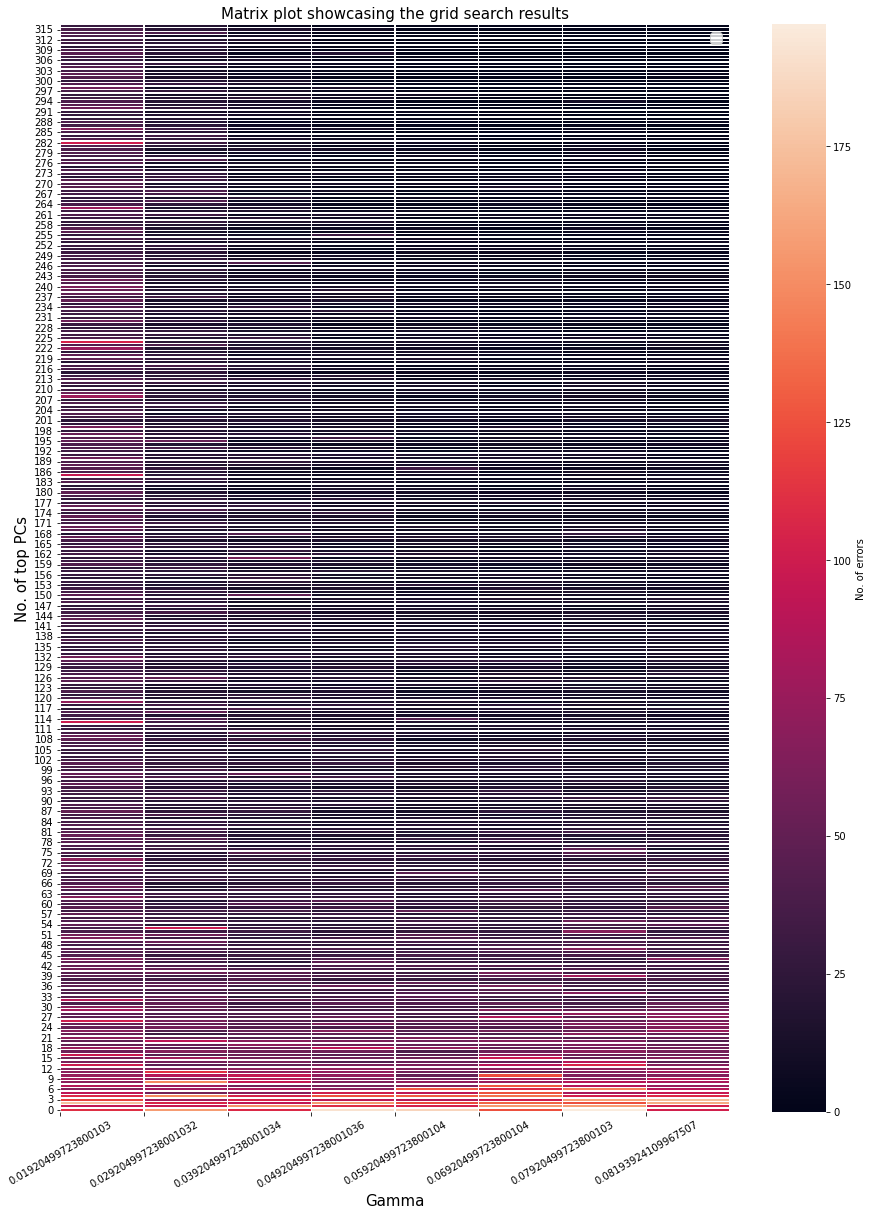

In [ ]:
# We not plot the entire grid-search matrix to produce a heatmap with the gradient color indicating the total number of errors made for a given weight matrix refined by the multi-class perceptron 
# However, due to the large size of the hyperparameter space, the plot below is simply used to showcase a successful plot of the grid-search matrix 

plt.figure(figsize=(15,20))
ax = sns.heatmap(final_grid_matrix, linewidths=0.30, cbar_kws={'label': 'No. of errors'}) 
ax.invert_yaxis()
ax.set_xticks([0,1,2,3,4,5,6,7])
ax.set_xticklabels(gamma_increments(X_train), rotation = 30)
plt.xlabel("Gamma", fontsize = 15)
plt.ylabel("No. of top PCs", fontsize = 15)
plt.title("Matrix plot showcasing the grid search results", fontsize = 15)
plt.legend("No. of errors", fontsize = 15)
plt.show()

In [ ]:
# To dervive an intuitive understanding of whether linear separability is reached and for which pair of hyperparameter values, we plot a grid-search matrix for a subset of top PCs (225 to 329 PCs)

subset_grid_matrix = grid_matrix2(X_train, labels, 330, 225)

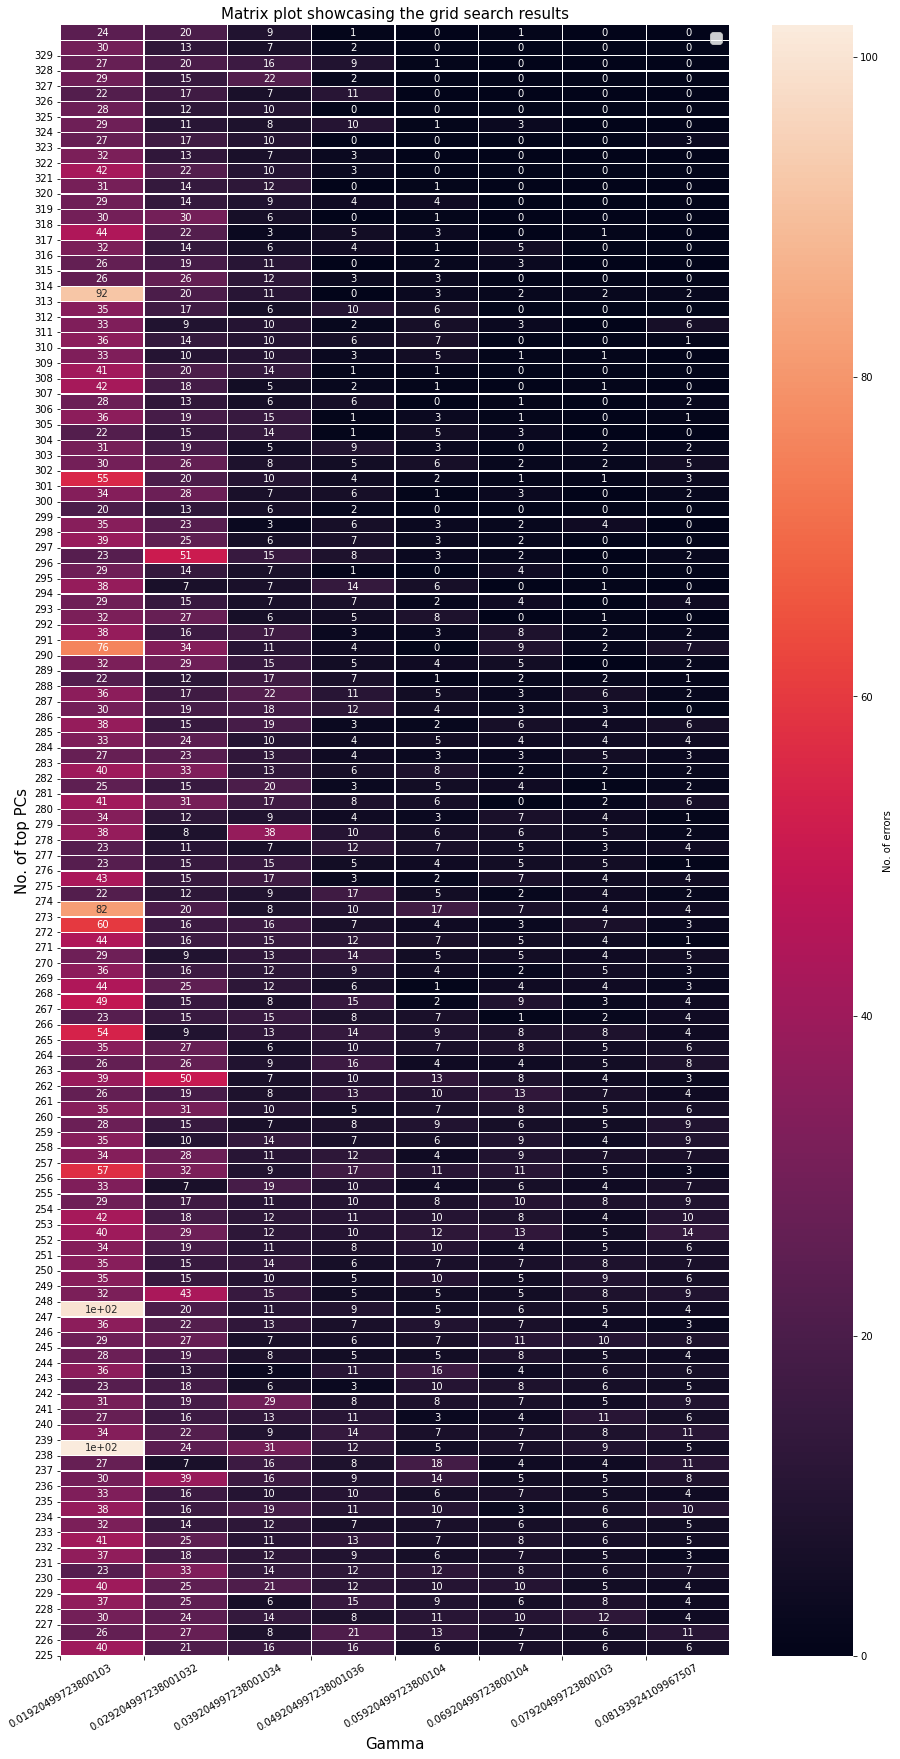

In [ ]:
plt.figure(figsize=(15,30))
ax = sns.heatmap(subset_grid_matrix, annot = True, linewidths=0.30, cbar_kws={'label': 'No. of errors'})
ax.invert_yaxis()
ax.set_xticks([0,1,2,3,4,5,6,7])
ax.set_xticklabels(gamma_increments(X_train), rotation = 30)
ax.set_yticks(list(range(0,len(range(225,330)))))
ax.set_yticklabels(list(range(225,330)))
plt.xlabel("Gamma", fontsize = 15)
plt.ylabel("No. of top PCs", fontsize = 15)
plt.title("Matrix plot showcasing the grid search results", fontsize = 15)
plt.legend("No. of errors", fontsize = 15)
plt.show()

After performing the multi-class perceptron algorithm on the feature space defined by kernel PCA, we can conclude that for specific pairs of hyperparameter values (gamma, top PCs), the data is indeed linearly separable in the feature space defined by kernel PCA. The grid search matrix plotted above can be used to determine for which specific hyperparameter pairs does the data become linearly separable. In the case above (a subset of the top PCs) we see that linear separability is achieved for the following hyperparameter values: (0.049... ,313), (0.059... ,290), (0.069... ,280), (0.079... ,289) and (0.081... ,286). 

However, it must be noted that the exact hyperparameter values, specifically for the top PCs will vary due to the random nature of the multi-class perceptron. The weight refinements may lead to 100% accuracy at different numbers of top PCs for a given gamma for each code run.

Therefore we can conclude that, for specific pairs of hyperparameter values (gamma, top PCs), the data is linearly separable in the feature space defined kernel/non-linear PCA. Thus projecting the dataset into a higher dimensional feature space using the kernel trick and non-linear PCA, we can obtain linear separability. 